In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall torch xformers -y torchaudio torchtext torchvision
!python -m pip install torch==1.11.0 torchvision --extra-index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 1.11.0
Uninstalling torch-1.11.0:
  Successfully uninstalled torch-1.11.0
Found existing installation: torchvision 0.12.0
Uninstalling torchvision-0.12.0:
  Successfully uninstalled torchvision-0.12.0
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
  Using cached torch-1.11.0-cp310-cp310-manylinux1_x86_64.whl (750.6 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.18.0%2Bcu118-cp310-cp310-linux_x86_64.whl (6.3 MB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.18.0-cp310-cp310-manylinux1_x86_64.whl (7.0 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.17.2%2Bcu118-cp310-cp310-linux_x86_64.whl (6.2 MB)
  Using cached torchvision-0.17.2-cp310-cp310-manylinux1_x86_64.whl (6.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0

In [ ]:
!pip install transformers==4.27.4 evaluate

In [ ]:
import torch

In [ ]:
pip install -q pytorchvideo==0.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip3 install huggingface_hub

In [ ]:
from huggingface_hub import hf_hub_download

hf_dataset_identifier = "sayakpaul/ucf101-subset"
filename = "UCF101_subset.tar.gz"
file_path = hf_hub_download(repo_id=hf_dataset_identifier, filename=filename, repo_type="dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


UCF101_subset.tar.gz:   0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
import tarfile

with tarfile.open(file_path) as t:
     t.extractall(".")

In [ ]:
!pwd

/content


In [ ]:
cp -r './drive/MyDrive/dataset/' ./dataset/

In [ ]:
import os

def get_directories_sorted_by_name(folder_path):
    # Dictionary to store directories
    directories = {}
    i=1

    # List all files and directories in the specified path
    for entry in sorted(os.listdir(folder_path)):
        # Full path of the entry
        full_path = os.path.join(folder_path, entry)

        # Check if the entry is a directory
        if os.path.isdir(full_path):
            # Add the directory to the dictionary
            directories[entry] = i
            i+=1

    return directories

# Specify the folder path here
folder_path = './dataset/train'

# Call the function and print the result
class_labels = get_directories_sorted_by_name(folder_path)
print(class_labels)

{'made': 1, 'missed': 2}


In [ ]:
# class_labels = sorted({str(path).split("/")[2] for path in all_video_file_paths})
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")


Unique classes: ['made', 'missed'].


In [ ]:
from transformers import VideoMAEImageProcessor, VideoMAEForVideoClassification

model_ckpt = "MCG-NJU/videomae-base"
image_processor = VideoMAEImageProcessor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,  # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/377M [00:00<?, ?B/s]

Some weights of the model checkpoint at MCG-NJU/videomae-base were not used when initializing VideoMAEForVideoClassification: ['decoder.head.weight', 'decoder.decoder_layers.2.attention.attention.q_bias', 'decoder.decoder_layers.1.attention.output.dense.weight', 'decoder.decoder_layers.2.layernorm_before.bias', 'decoder.decoder_layers.0.attention.attention.v_bias', 'decoder.head.bias', 'decoder.decoder_layers.0.intermediate.dense.bias', 'decoder.decoder_layers.2.attention.output.dense.bias', 'decoder.decoder_layers.0.attention.attention.q_bias', 'decoder.decoder_layers.1.layernorm_before.weight', 'decoder.decoder_layers.1.output.dense.bias', 'decoder.decoder_layers.2.attention.attention.query.weight', 'decoder.decoder_layers.0.attention.attention.value.weight', 'decoder.decoder_layers.3.layernorm_before.weight', 'decoder.decoder_layers.3.output.dense.weight', 'decoder.decoder_layers.1.attention.attention.q_bias', 'decoder.decoder_layers.1.layernorm_before.bias', 'decoder.decoder_layers

In [ ]:
import pytorchvideo.data
import pytorchvideo
import pytorchvideo.transforms

from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    RandomCrop,
    RandomHorizontalFlip,
    Resize,
)

In [ ]:
mean = image_processor.image_mean
std = image_processor.image_std
if "shortest_edge" in image_processor.size:
    height = width = image_processor.size["shortest_edge"]
else:
    height = image_processor.size["height"]
    width = image_processor.size["width"]
resize_to = (height, width)

num_frames_to_sample = model.config.num_frames
sample_rate = 4
fps = 30
clip_duration = num_frames_to_sample * sample_rate / fps

In [ ]:
train_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    RandomShortSideScale(min_size=256, max_size=320),
                    # RandomCrop(resize_to),
                    RandomHorizontalFlip(p=0.5),
                ]
            ),
        ),
    ]
)
dataset_root_path = './dataset'
train_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "train"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    Resize(resize_to),
                ]
            ),
        ),
    ]
)

val_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "val"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

test_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "test"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

In [ ]:
print(train_dataset.num_videos, val_dataset.num_videos, test_dataset.num_videos)

133 21 37


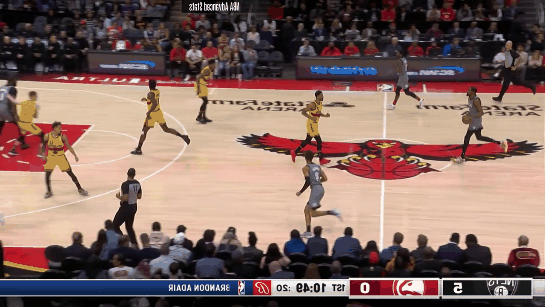

In [ ]:
import imageio
import numpy as np
from IPython.display import Image

def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)

def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.

    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename

def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

sample_video = next(iter(train_dataset))
video_tensor = sample_video["video"]
display_gif(video_tensor)

In [ ]:
from transformers import TrainingArguments, Trainer

model_name = model_ckpt.split("/")[-1]
new_model_name = f"{model_name}-finetuned-ucf101-subset"
num_epochs = 4

args = TrainingArguments(
    new_model_name,
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
    max_steps=(train_dataset.num_videos // 8) * num_epochs,
)



In [ ]:
! mkdir made
! mv *.mp4 made/

mv: cannot stat '*.mp4': No such file or directory


In [ ]:
! cp -r dataset/ data2/
! rm -rf data2/made
! cp -r made data2/

In [ ]:
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
import torch
def collate_fn(examples):
    # permute to (num_frames, num_channels, height, width)
    pixel_values = torch.stack(
        [example["video"].permute(1, 0, 2, 3) for example in examples]
    )
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)



In [ ]:
trainer.push_to_hub()

In [ ]:
train_results = trainer.train()
